# Digital Image Processing Chapter 9: Morphological Image Processing

1. **mathematical morphology** deals with extracting image components that are useful in the representation and desciption of region shape
    1. boundaries
    2. skeletons
    3. convex hull
2. morphology also deals with techniques for pre- or post-processing
    1. filtering
    2. thinning
    3. pruning
3. many of the ideas in morphology can be represented in *n-dimensional euclidean space*, $E^n$
    1. for binary images the space used is $Z^2$
4. morphology is used to extract "meaning" from an image

## Preliminaries
1. morphology is based on set theory
    * a **set** represents objects in an image
        * the set of all white/black pixels
    * binary images sets are members of the 2D integer space, $Z^2$
    * grayscale iamge sets are members of the 3D integer space, $Z^3$
        * two components represnt the coordinates and the third component represents the grayscale value
2. **set reflection** and **set translation** are used extensively in morphology
    * the reflection of set $B$: $\hat{B}=\{w | w = -b, \text{ for } b\in B\}$
    * the translation of set $B$: $(B)_z=\{c|c=b+z \text{, for } b\in B\}$
    

c:\Users\JUDE\anaconda3\envs\mastersthesis\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


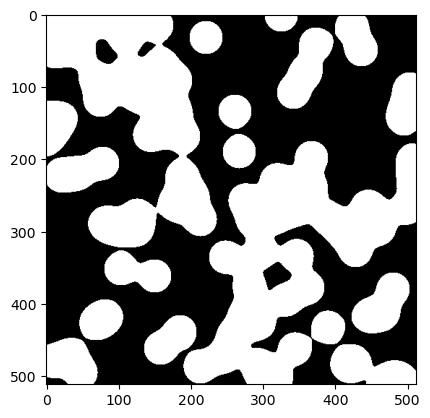

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, transform

blobs = data.binary_blobs()
#original image
plt.imshow(blobs, cmap='gray')

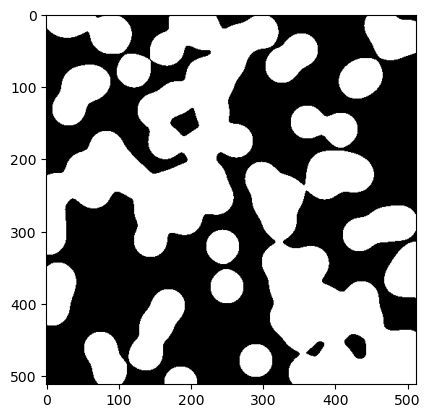

In [2]:
#dirty way of flipping an image with numpy. ::-1 means all elements with reverse step size
flipped_blobs = blobs[::-1, ::-1]
plt.imshow(flipped_blobs, cmap='gray')

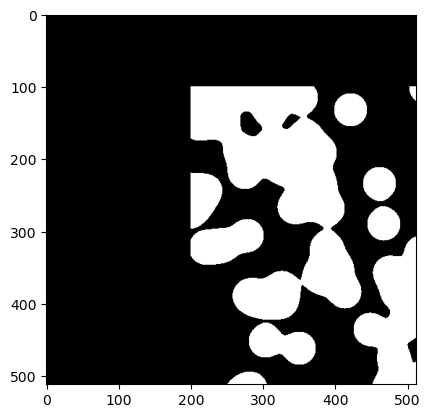

In [3]:
#dirty way of transforming an image
tx = 200
ty = 100
transformed_blobs = np.empty

# uses cartesian coordiantes
eucTrans = transform.EuclideanTransform(translation=(-tx, -ty))
transformed_blobs = transform.warp(blobs, eucTrans)

plt.imshow(transformed_blobs, cmap='gray')

* a **Structuring Elements** (**SEs**) are small sets or subimages used to probe an image under study for properties of interest
    * in digital image processing an SE is an array
    * padding added to SE and original image
    * in pure math, the background is not a part of the SE
* set reflection and translation in techniques that employ
* a **morphological operation** of set $A$ using SE $B$ is as follows
    1. create a new set by running $B$ over $A$ such that the origin of $B$ visits every element of $A$
    2. for each location in $A$
        * if $B$ is completely contained in $A$ ($A$ and $B$ fully overlap) then mark that location as a member of the new set
        

## Erosion and Dilation
* Erosion and Dilation are both fundamental to morphology. many morphological operations are based on them

### Erosion
* with $A, B \in Z^2$, the erosion of A by B is defined as: $A\ominus B = \{z | (B)_z\subseteq A\}$
    * the erosion of $A$ by $B$ is the set of all points $z$ such that $B$, translated by $z$ is contained in $A$
* equivalent definition: $A\ominus B=\{z | (B)_z\cap A^c =\varnothing \}$
* erosion shrinks or thins binary options, and can be used to remove small islands  
    * erosion can be considered a **morphological filtering** operation

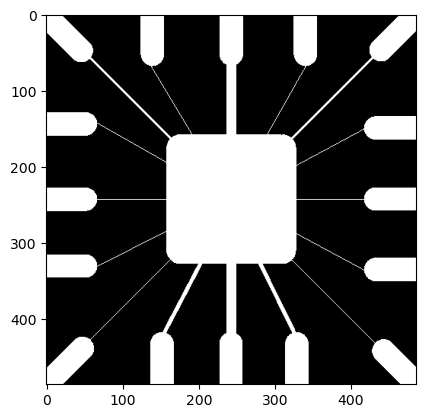

In [4]:
from skimage.io import imread

wire_mask_binary = imread('.\DIP3E_Original_Images_CH09\Fig0905(a)(wirebond-mask).tif')
wire_mask_binary = np.invert(wire_mask_binary)
plt.imshow(wire_mask_binary, cmap='gray')

In [5]:
from skimage import morphology

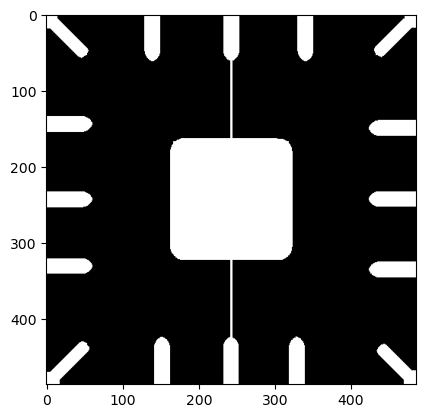

In [6]:
#square structuring element of size 11x11
se = np.ones((11, 11), dtype=bool)

#middle line ist still there since it is wider than 11
plt.imshow(morphology.binary_erosion(wire_mask_binary, se), cmap='gray')

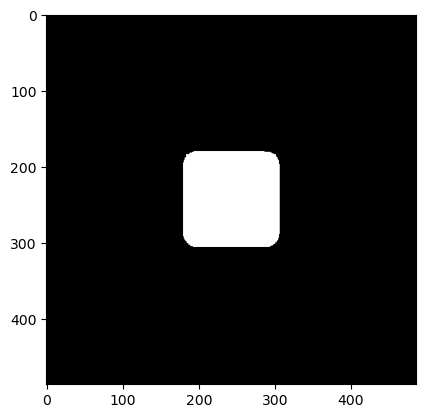

In [7]:
se_larger = np.ones((45, 45), dtype=bool)

plt.imshow(morphology.binary_erosion(wire_mask_binary, se_larger), cmap='gray')

### Dilation
* the dilation of $A$ and $B$, is defined by:
* $A\oplus B=\{z | [(\hat{B})_z \cap A]\subseteq A\}$
    * the above definition is more intuitive when B is viewed as a *convolutional mask* \
    * $B$ is rotated flipped around its origin and then sucessively displaced to slide over the set
    * the dilation of $A$ by $B$ is the set of all displacements such that $\hat{b}$ and $A$ overlap by *at least* one element
* alternate definition: $A\oplus B=\{z | [(\hat{B})_z \cap A]\neq \varnothing\}$
* alternate definition: $A\oplus B = \cup_{b\in B} (A)_b$
* dilation grows, or thickens, objects of a binary image. can also bridge gaps and fill holes

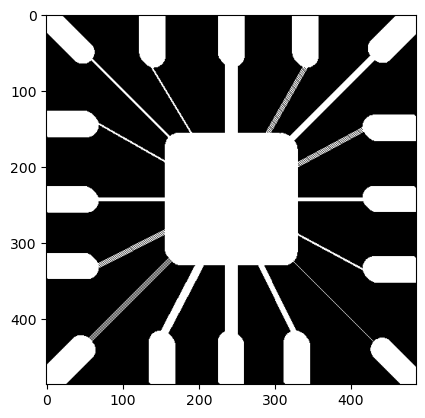

In [8]:

se_line = np.array([[1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1]])
#se_line = se_line[::-1, ::-1]



plt.imshow(morphology.binary_dilation(wire_mask_binary, se_line), cmap='gray')

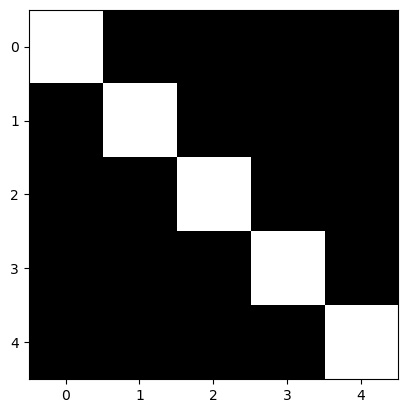

In [9]:
#diagonal structuring element
plt.imshow(se_line, cmap='gray')

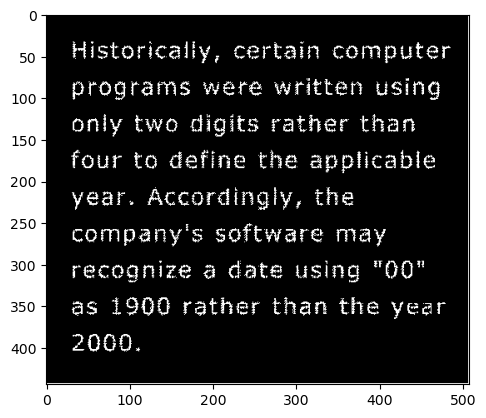

In [10]:
#using dilation to bridge gaps
text_gaps = imread('.\DIP3E_Original_Images_CH09\Fig0907(a)(text_gaps_1_and_2_pixels).tif')
plt.imshow(text_gaps, cmap='gray')

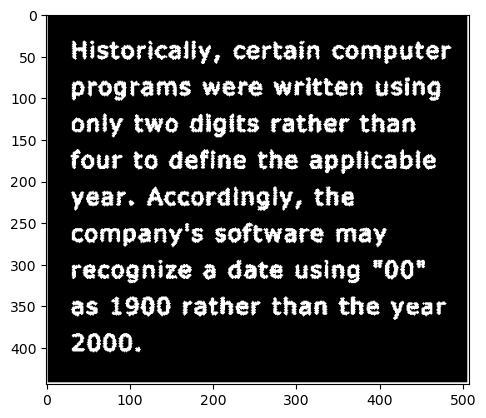

In [11]:
cross_se = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]])

plt.imshow(morphology.binary_dilation(text_gaps, cross_se), cmap='gray')

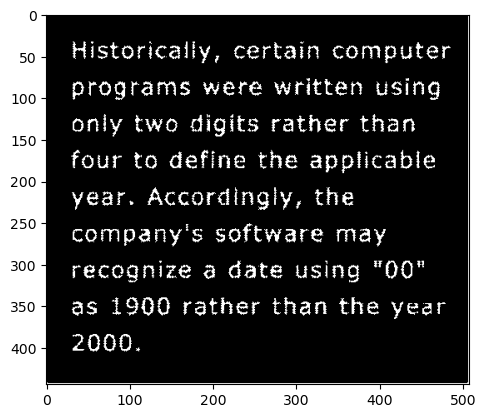

In [12]:
#dilation followed by erosion
plt.imshow(morphology.binary_erosion(morphology.binary_dilation(text_gaps, cross_se), cross_se), cmap='gray')

## Duality
* erosion and ddilation of duals of each other w.r.t. set complemtnaion and reflection
    * $(A\ominus B)^c = A^c\oplus \hat{B}$
    * $(A\oplus B)^c = A^c\ominus \hat{B}$
* that is, the erosion of A by B is the complement of the dilation of $A^c$ by $\hat{B}$
* when $\hat{B}=B$ (meaning $B$ is symmetric) then we can obtain the erosion of an image by B by dilating it's background (the complement)

proof: 
1. $(A\ominus B)^c = \{z | (B)_z \subseteq A\}^c$
2. $(A\ominus B)^c = \{z | [(B)_z \cap A^c]=\varnothing\}^c$ //equivalent definition ($B$ must be fully contained by $A$)
3. $(A\ominus B)^c = \{z | [(B)_z \cap A^c]\neq \varnothing\}$ //complement the set
4. $(A\ominus B)^c = A^c\oplus \hat{b}$ //remember that $\hat{\hat{B}}=B$

## Opening and Closing
* dilation expands the components of an image and erosion shrinks them
* **opening**: $A \circ B = (A\ominus B)\oplus B$
    * is a morphological operation that
        *  smooths the contour of an object
        * breaks down narrow ithmuses
        * eliminates thin protrusions
    * geometric interpretation: viwe the structuring element as a rolling ball, the boundary of $A\circ B$ is etablished by the points in B that reach the farthest into the boundary of $A$ as $B$ is rolled around **inside** the boundary
    * alternate definition: $A\circ B = \cup\{(B)_z | (B)_z\subseteq A\}$
* a **closing**: $A \bullet B = (A\oplus B)\ominus B$
    * is a morphological operation that
        * smooths sections of contours
        * fuses narrow breaks and long thin gulfs
        * eliminates small holes
        * fills caps in the contour
    * geomtric interpretation: same as the geometric interpretation of an opening, but the ball is rolled on the **outside** of the shape
        * a point $w$ is an element of $A\bullet B$ iff $(B)_z\cap A\neq \varnothing$
* opening closing duality
    * like erosion and dilation, opening and closing are duals of reach other w.r.t complementation and reflection
    * $(A\bullet B)^c=(A^c\circ \hat{B})$
    * $(A\circ B)^c=(A^c\bullet \hat{B})$
* opening properties
    * $A\circ B$ is a subset of $A$; $[A\circ B]\subseteq A$
    * if $C is a subset of $D$, then $C\circ B$ is a subset of $D\circ B$
    * $(A\circ B)\circ B= A\circ B$
* closing properties
    * $A$ is a subset of $A\bullet B$; $A\subseteq A\bullet B$
    * if $C$ is a subset of $D$, then $C\bullet B$ is a subset of $D\bullet B$
    * $(A\bullet B)\bullet B= A\bullet B$
* an opening followed by a closing can funciton to remove noise

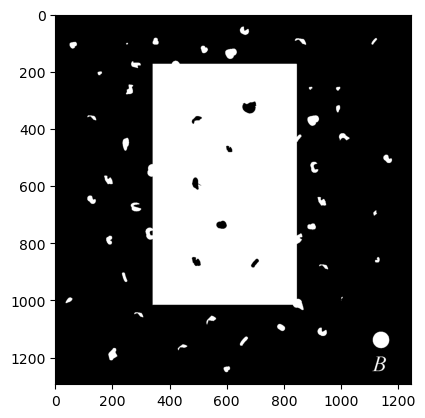

In [13]:
u_shape = imread('.\DIP3E_Original_Images_CH09\FigP0917(noisy_rectangle).tif')

plt.imshow(u_shape, cmap='gray')

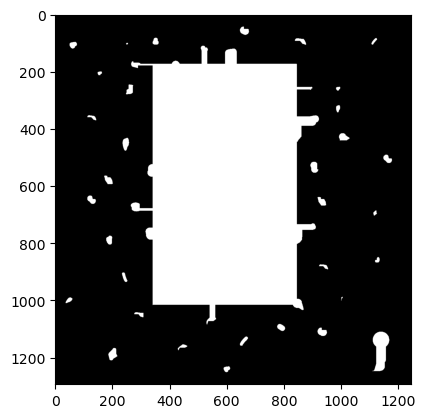

In [14]:
plt.imshow(morphology.binary_closing(u_shape, se_larger), cmap='gray')

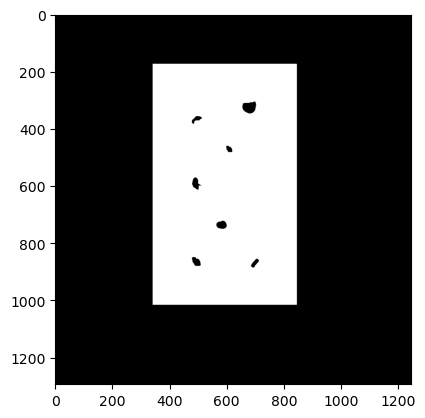

In [15]:
plt.imshow(morphology.binary_opening(u_shape, se_larger), cmap='gray')

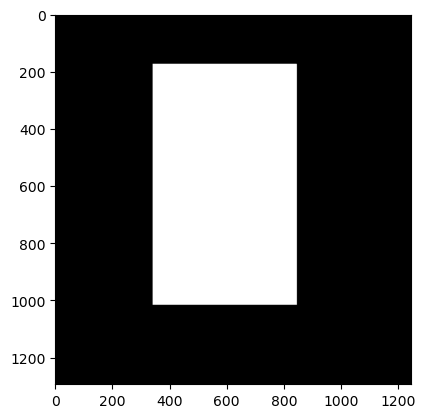

In [16]:
plt.imshow(morphology.binary_closing(morphology.binary_opening(u_shape, se_larger), se_larger), cmap='gray')

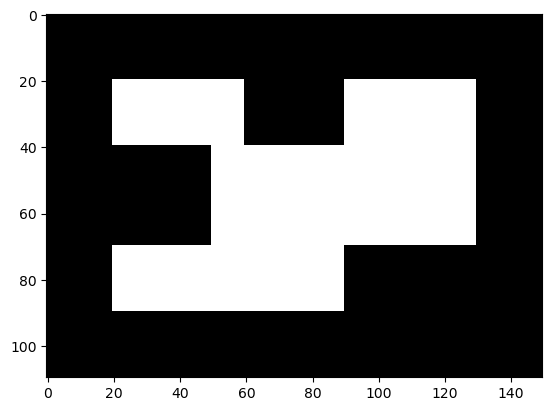

In [83]:
# making a geometric shape
rect_shape = np.ones((7, 11))
rect_shape[2:5, :3] = 0
rect_shape[5:, 7:] = 0
rect_shape[:2, 4:7] = 0
rect_shape = np.pad(rect_shape, 2, constant_values=0)
repeat_num = 10
rect_shape = np.repeat(rect_shape, repeat_num, axis=0)
rect_shape = np.repeat(rect_shape, repeat_num, axis=1).astype(bool)

plt.imshow(rect_shape, cmap='gray')

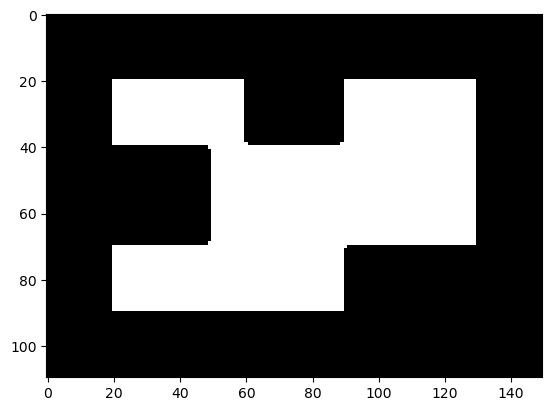

In [42]:
#closing of rect_shape
plt.imshow(morphology.binary_closing(rect_shape), cmap='gray')

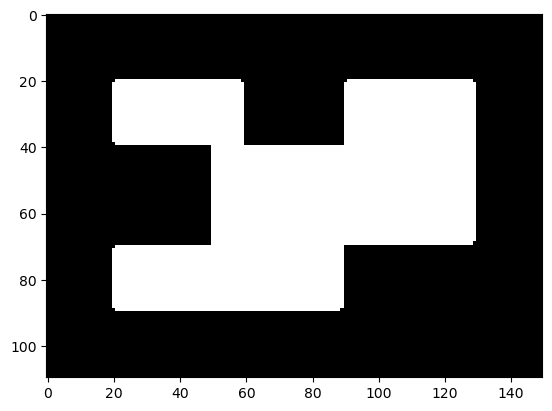

In [43]:
#opening of rect_shape
plt.imshow(morphology.binary_opening(rect_shape), cmap='gray')

## 9.4 Hit-or-Miss Transform
$$A\circledast B=(A\ominus B_1)\cap(A^C\ominus B_2) = (A\ominus B_1)-(A\oplus \hat{B_2})$$

* the morphological **Hit-or-Miss** transform is a basic tool for shape detection
* given:
    * a universe of shapes $A=C\cup D\cup E$:
    * a window, $W$
    * the local background of $D$ w.r.t. $W$, $(W-D)$
* goal: find shape $D$
* the origin of each chape is located at its center of gravity
* let $D$ be enclosed by $W$
* $A\ominus D$ can be viewed as theset of all locations of the origin of $D$ at which $D$ found a match (hit) in $A$
    * used to filter shapes smaller than D
* $A^c\ominus (W-D)$ can be viewed as the set of locations for which $D$ can fit *exactly* inside $A$
    * used to filter shapes larger than D
* $A\circledast B = (A\ominus D)\cap [A^c \ominus (W-D)]$ is the hit-or-miss transform
    * it is the intersection of all locations at which D fits inside A and the set of locations for which D fits exactly inside $A$
* Generalized Notation: $A\circledast B=(A\ominus B_1)\cap(A^C\ominus B_2) = (A\ominus B_1)-(A\oplus \hat{B_2})$
    * where 
        * $B=(B_1, B_2)$
            * $B_1=D$ is the set formed from elements of $B$ associated with an object
            * $B_2=(W-D)$ is the set of elements of $B$ associated with the corresponding bakcground
    * $A\circledast B$ contains all the origin points at which, simultaniously, $B_1$ formed a match in $A$ and $B_2$ found a match in $A^c$
* the hit-or-miss transform assumes that each object has at least a 1 pixel background surrounding it

## 9.5 Some Basic Morphological Algorithms
* morphology can be used for
    * feature extraction
        * boundary extraction
        * connected components
        * convex hull
        * skeleton
    * pre/post processing
        * region filling
        * thinning
        * thickening
        * pruning
    * etc
* boundary extraction
    * the boundary of a set, $\beta(A)$ can be obtained by first eroding $A$ by $B$, and then performing the set difference between A and it's erosion
        * $\beta(A) = A-(A\ominus B)$
        * a larger structuring element will result in a larger boundary


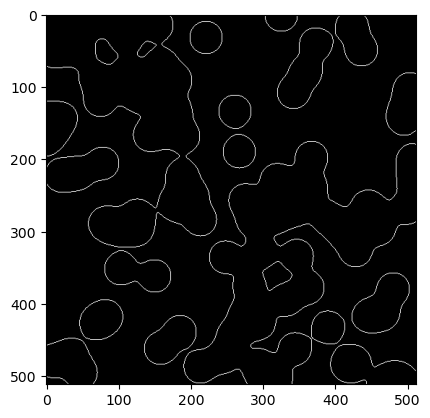

In [44]:
blobs_ero = morphology.binary_erosion(blobs, cross_se)

#set difference of A and the erosion of A by cross_se
#had to use XOR operator since blobs is a binary array
plt.imshow((blobs ^ blobs_ero), cmap='gray')

* Hole Filling
    * a **hole** is defined as a background region surrounded by a connected border of foreground pixels
    * given
        * X_0 - an array of 0s the same size as the array containing A, *except* at the locations corresponding to the given points in each hole
        * $B$ is a symmetric structuring element
    * goal to fill all holes with foreground pixels
    * hole filling equation: $X_k=(X_{k-1}\oplus B)\cap A^c \text{ for } k=1, 2, 3, \ldots$
        * terminates when $X_k = X_{k-1}$
        * the intersection with $A^c$ bounds the dilation to the region of interest
            * remember that intersection means Set_1 *and* Set_2. hole dilation will be limited by the foreground pixels in $A$
    * final $X_k$ is unioned with A to get the region A minus any holes
    * **conditional dilation** is dilation conditioned to meet a desired property, like not exceeding the bounds of the ROI

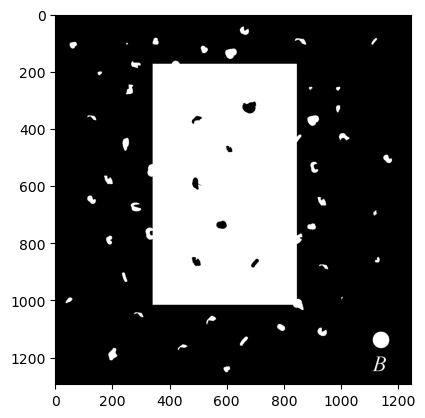

In [21]:
plt.imshow(morphology.remove_small_holes(u_shape), cmap='gray')

* Extraction of Connected Components
    * given
        * $A$ - a set containing one or more connected components
        * $X_0$ - an array of 0s except at each location known to correspond to a point in each connected component
    * goal: start with $X_0$ and find all connected components
    * CC equation: $X_k = (X_{k-1}\oplus B)\cap A \text{ for } k=1, 2, 3,\ldots$

NOTE: connectivity depends on SE used (cross for 4-connnectivity, full for 8-connectivity)

NOTE: both hole filling and connected component extraction (in these examples) are simply repeated dilation of points known to be contained in those holes/regions

* Convex Hull
    * a set $A$ is said to be *convex* if the straight line segment joining any two points in $A$ lies entirely within $A$
    * the **convex hull**, $H$, of an arbitrary set $S$ is the smallest convex set contining $S$
    * the **convex deficiency** of $S$ is the set difference $H-S$
* algorithm to obtain the convex hull, $C(A)$
    * given
        * $B^i \text{ for } i=1, 2, 3, 4$ be four structuring elements (border lines with "don't care" values everywhere else, except for the center)
            * for these filters, a match occurs when the center pixel is 0, and the three shaded pixels are 1. the rest are "don't cares"
    * equation: $X_k^i=(X_{k-1}\circledast B^i)\cup A \text{ for } i=1, 2, 3, 4 \text{ and } k=1, 2, 3,\ldots$
        * $X_0^i=A$
        * when the procedure converges $X_k^i=X_{k-1}^i$, we let $D^i=X_k^i$
        * finally, the convex hull is: $C(A)=\cup_{i=1}^4D^i$
    * above method consists of iteratively applyuing the hit-or-miss transform (the simplified version with no background check) to A with the four structuring elements
    * one problem with this approach is that the convex hull can grow beyond the minimum dimensions required to guarantee convexity. this can be corrected by limiting growth to no extend past the vertical and horizontal dimensions of the set of points

convex hull kernels:
$$B^i=\bigg\{ \begin{bmatrix} 1 & x & x  \\ 1 & 0 & x \\ 1 & x & x \end{bmatrix}, \begin{bmatrix} 1 & 1 & 1 \\ x & 0 & x \\ x & x & x \end{bmatrix}, \begin{bmatrix} x & x & 1 \\ x & 0 & 1 \\ x & x & 1 \end{bmatrix}, \begin{bmatrix} x & x & x \\ x & 0 & x \\ 1 & 1 & 1\end{bmatrix}\bigg\}$$

* Thinning
    * the **thinning** of a set $A$ by a structuring element $B$ can be defined in terms of the hit-or-miss transform
    * equation: $A\otimes B=A-(A\circledast B)=A\cap(A\circledast B)^c$
        * simplified hit-or-miss, no background check
    * more useful equation: 
        * &$\{B\}=\{B^1, B^2, \ldots, B^n\}$
            * where $B^i$ is a rotated version of $B^{i-1}$
        * using the above concept:
            * $A\otimes \{B\}=((\ldots((A\otimes B^1)\otimes B^2)\ldots )\otimes b^n)$
    * the process is to thin $A$ by *one pass* with $B^1$, then thin the result with one pas of $B^2$, and so on, until no changes occur

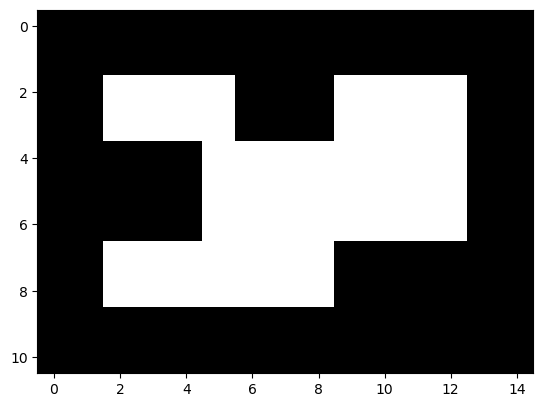

In [22]:
plt.imshow(rect_shape, cmap='gray')

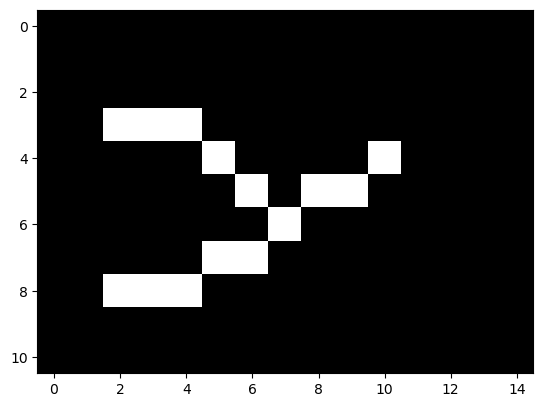

In [23]:
plt.imshow(morphology.thin(rect_shape), cmap='gray')

NOTE: 0 values in scipy/skimage/cv2 kernels act as don't care values

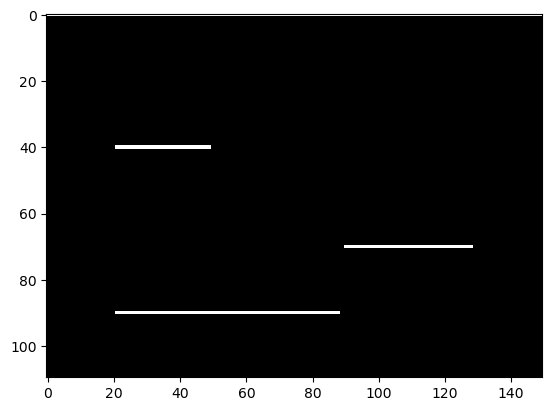

In [82]:
se_thin = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [0, 0, 0]])
se_thin_c = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]]) #pretty much going to be equivalent to A^c once the erosion is performed

plt.imshow(morphology.binary_erosion(rect_shape, se_thin) & ~(rect_shape.astype(bool)), cmap="gray")

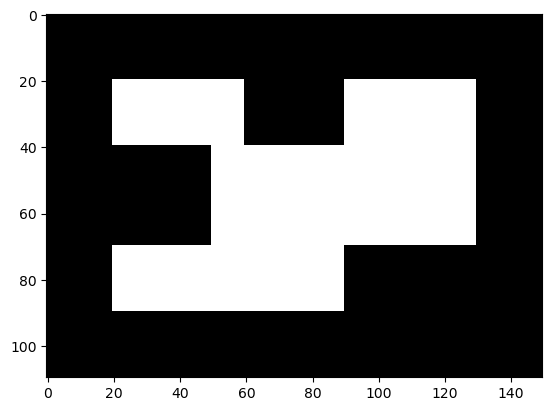

In [84]:
plt.imshow(rect_shape & ~(morphology.binary_erosion(rect_shape, se_thin) & ~(rect_shape.astype(bool))), cmap="gray")

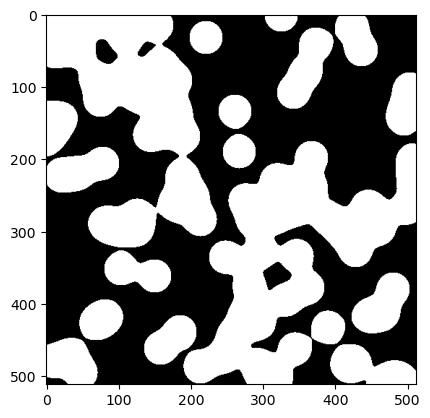

In [24]:
plt.imshow(blobs, cmap='gray')

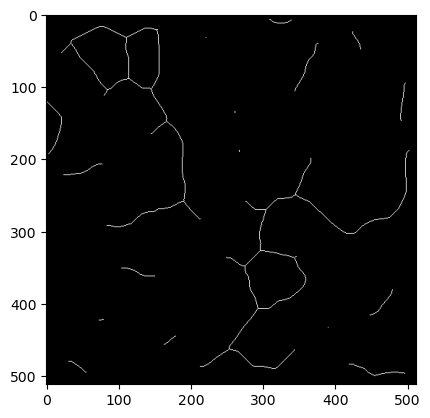

In [25]:
plt.imshow(morphology.thin(blobs), cmap='gray')

* Thickening
    * **thickening** is the morphological dual of thinning
    * equation: $A\circledcirc B=A\cup (A\circledast B)$
        * this time B consists of eight different SEs
            * four shaded dots on all eight corners of a 3x3 square
            * two "don't cares" on the sides of the shaded squares
            * the rest are non-shaded
    * like thinning, can be defined like: $A\circledcirc B=((\ldots ((A\circledcirc b^1)\circledcirc B^2)\ldots)\circledcirc B^n)$
    * the usual process, in practice, is to thin the background of the set and then complement teh result
        * $C=A^c$
        * thin $C$
        * Form C^C
        * $A\circledcirc B = (A^c\otimes B)^c \leftrightarrow (A\circledcirc B)^c = A^c\otimes B$
            * structuring element is probably symmetrical

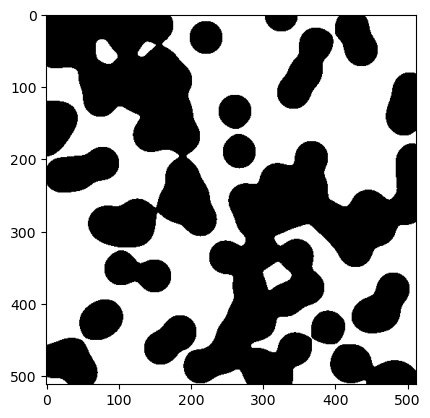

In [85]:
#skimage doesn't seem to have a thickening method. going to try the above method
blobs_c = ~blobs
plt.imshow(blobs_c, cmap='gray')

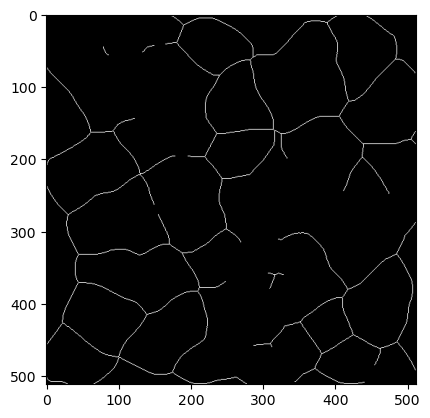

In [27]:
thinned_blobs_c = morphology.thin(blobs_c)
plt.imshow(thinned_blobs_c, cmap='gray')

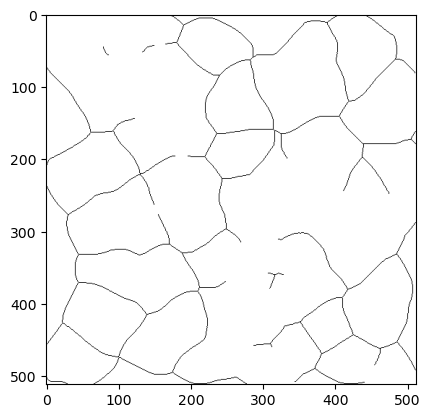

In [86]:
thickened_blobs = ~thinned_blobs_c
plt.imshow(thickened_blobs, cmap='gray')

NOTE: thickening seems to expand shapes in an image up to the boundary of each other, similar to voroni diagram?

* Skeletonization
    * the **skeleton** of $A$, $S(A)$ is defined with this
        1. if $z$ is a point of $S(A)$ and $(D)_z$ is the largest disk centered at $z$ adn contained in $A$, one cannot find a larger disk (doesn't have to be centered at $z$) containing $(D)_z$ and remaining in $A$
            * $(D)_z$ is the maximum disk
        2. $(D)_z$ touches the boundary of A at two or more places
    * skelethons can be epressed in terms of erosions and openings
        * $S(A)=(A\ominus kB)-(A\ominus kB)\circ B$
            * where: 
                * B is a structuring element
                * $(A\ominus kB)$ indicates $k$ sucessive erosions of $B$, like with thinning and thickening
                * k is the last iterative step before A erodes into an empty set
                * $K=max\{k|(A\ominus kB)\neq \varnothing\}$
            * $S(A) can be obtained as teh union of skeleton subsets $S_k(A)$
            * A can be *reconstructed* from these subsets by using: $A=\cup_{k=0}^{k}(S_k(A)\oplus kB)$

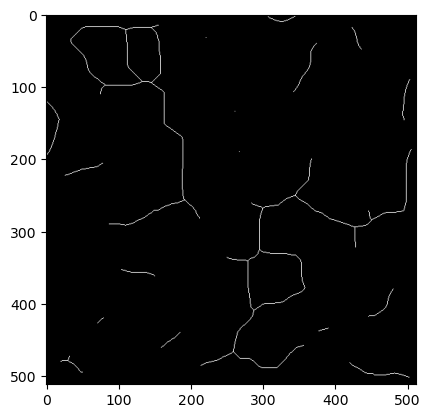

In [29]:
plt.imshow(morphology.skeletonize(blobs), cmap='gray')

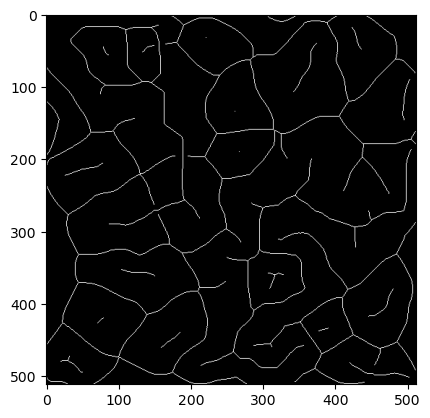

In [30]:
plt.imshow(morphology.skeletonize(blobs) + thinned_blobs_c, cmap='gray')

* Pruning
    * removes parasitic components that need to be "cleaned up" by post processing
    * IMPORTANT: a common approach to the automated recognization of handwritten characters is to analyze the shape of the skeleton of each character
    * spurs are caused by the erosion of non-uniformities in teh strokes composing the characters
    * ASSUMPTION: the length of a spur does not exceed a specified number of pixels
        * three or less pixels in this example
    * algorithm:
        * we thin the input set A with a sequence of structuring elements designed to detect only end points
        * $X_1$ is the set containing the set $A$, but thinned by the (eight) structuring elements
        * $X_2=\cup_{k=1}^{8}(X_1\circledast B^k)$
        * $X_3=(X_2\oplus H)\cap A$
            * $H$ is a 3x3 structuring element of 1
            * this step is performed three times (same amount as min predicted length of parasitic branches) to restore shortened branches (but not parasitic branches)
        * $X_4=X_1\cup X_3$
            * desired result

$$B^k=\bigg\{\begin{bmatrix} x & 0 & 0 \\ 1 & 1 & 0 \\ x & 0 & 0\end{bmatrix} \text{ rotated 90 deg, four times} \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix} \text{ also rotated 90 deg, four times}\bigg\}$$


## Morphological Reconstruction
* morphological reconstruction
    * involves two images and a structuring element:
        * the **marker** is one image and contains the starting points for the transformation
        * the other point is the **mask** and constrains the transformation
        * the structuring element is used to defined connectivity
    * https://www.mathworks.com/company/newsletters/articles/morphological-reconstruction.html
* Geodesic Dilation and Erosion
    * central concepts of morphological reconstruction
    * Geodesic Dilation
        * size 1: $D^{(1)}_G(F)=(F\oplus B)\cap G$
        * size $n$: $D^{(n)}_G(F) = D^{(1)}_G[D^{(n-1)}_G]$
        * $G$ limits the growth of the dilation of marker $F$
    * Geodesic Erosion
        * size 1: $E^{(1)}_G(F)=(F\ominus B)\cup G$
        * size n: $E^{(n)}_G(F)=E^{(1)}_G(F)[E^{(n-1)}_G(F)]$
        * $E^{(0)}_G(F)=F$
        * the set union operation guarantees that the deodesic erosion of an image remains greater than or equal to the mask image
    * where:
        * $F$ is the marker image
        * $G$ is the mask image
        * both images are binary (grayscale later in book)
* morphological reconstruction by dilation and by erosion
    * by dilation
        * $R^D_G(F)=D^{(k)}_G(F)$
        * where:
            * ending condition: $D^K_G=D^{(k-1)}_G$
        * it is the geodesic dilation of $F$ w.r.t. $G$ until the output is stable
    * by erosion:
        * $R^E_G(F)=E^{(k)}_G(F)$
        * where:
            * ending condition: $E^{(k)}_G(F)=E^{(k+1)}_G(F)$

### Sample Appllications
* wide variety of practical applications, determined by:
    * selection of marker and mask images
    * by structuring element
    * by combinations of primitive elements
* opening by reconstruction
    * restores shapes exactly
        * regular opening has dilation attempt to restore the shape, it is dependant onthe simiarlity of shapes of the objects and the strucuturing element
    * equation: $O^{(N)}_R(F)=R^D_F[(F\ominus nB)]$
    * where:
        * $F$ is eroded $n$ times by $B$
* Filling Holes
    * fully automated procedure based on morphological reconstruction
    * let
        * $I(x, y)$ be a binary image
        * $F$ is amarker image that is 0 everywhere except at the image border where it is inverted
    * $F(x, y)=\begin{cases} 1-I(x, y) & \text{if on border of } I \\ 0 & \text{otherwise}\end{cases}$
    * then: $H=[R^D_{I^c}(F)]^c$
    where:
        * $H$ is the binary image with the holes filled. filled because the dilation operation cannot reach the interior
* border clearning
    * removing objects that touch the border is important for removing or screening partial objects in the image


## Gray-Scale Morphology
* maybe not needed, but a good read through